In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

from scipy.stats import ttest_ind_from_stats
from sklearn.model_selection import StratifiedKFold

In [2]:
df_path = './2020output_DFR.xlsx'
df = pd.read_excel(df_path)
df = pd.DataFrame(df)

In [3]:
df = df.drop(columns=['Unnamed: 0', 'Litigious', 'ModalStrong', 'ModalWeak', 'Negative', 'Positive', 'Uncertainty'])
df.columns

Index(['公司代碼', '公司名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一', '會計師二',
       'KAM', 'KAM_len', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數',
       '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)', 'Litigious%', 'ModalStrong%',
       'ModalWeak%', 'Negative%', 'Positive%', 'Uncertainty%'],
      dtype='object')

In [4]:
df = df.rename(columns={"Litigious%": "爭議詞比例", "ModalStrong%": "強語氣詞比例","ModalWeak%": "弱語氣詞比例"
                   ,"Negative%": "負面詞比例","Positive%": "正面詞比例","Uncertainty%": "不確定詞比例"})

In [5]:
df1_path = './2021output_DFR.xlsx'
df1 = pd.read_excel(df1_path)
df1 = pd.DataFrame(df1)

In [6]:
df1 = df1.drop(columns=['Unnamed: 0', 'Litigious', 'ModalStrong', 'ModalWeak', 'Negative', 'Positive', 'Uncertainty'])
df1.columns

Index(['公司代碼', '公司名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一', '會計師二',
       'KAM', 'KAM_len', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數',
       '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)', 'Litigious%', 'ModalStrong%',
       'ModalWeak%', 'Negative%', 'Positive%', 'Uncertainty%'],
      dtype='object')

In [7]:
df1 = df1.rename(columns={"Litigious%": "爭議詞比例", "ModalStrong%": "強語氣詞比例","ModalWeak%": "弱語氣詞比例"
                   ,"Negative%": "負面詞比例","Positive%": "正面詞比例","Uncertainty%": "不確定詞比例"})

In [8]:
print(len(df))
print(len(df1))

2040
1997


In [9]:
df = df.append(df1)

In [10]:
#區分是否為四大會計師事務所
t = (df["是否為四大事務所"] == 1)
df_T = df[t]#.sample(n = 202, replace = False)  #3637
f = (df["是否為四大事務所"] == 0)
df_F = df[f]   #400

df = df_T.append(df_F)

In [11]:
print(len(df_T))
print(len(df_F))
print(len(df))

3637
400
4037


#### 敘述性統計

In [12]:
def StatisticalNarrativesToFrameByOne(frame):
    sncount = []
    snmean = []
    snstd = []
    snmax = []
    snmin = []
    snind = []
    for x in inde:
        sncount.append(frame[x].count())
        snmean.append(frame[x].mean())
        snstd.append(frame[x].std())
        snmax.append(frame[x].max())
        snmin.append(frame[x].min())
    StatRes = pd.DataFrame()
    StatRes['Count'] = sncount
    StatRes['Mean'] = snmean
    StatRes['StD'] = snstd
    StatRes['Max'] = snmax
    StatRes['Min'] = snmin     
    StatRes.index = inde
    
    return(StatRes)

In [13]:
typee = ['四大','非四大']
def StatisticalNarrativesToFrameGather():
    sncount = []
    snmean = []
    snstd = []
    snmax = []
    snmin = []
    snind = []
    for x in inde:
        sncount.append(df_T[x].count())
        snmean.append(df_T[x].mean())
        snstd.append(df_T[x].std())
        snmax.append(df_T[x].max())
        snmin.append(df_T[x].min())
    for x in inde:       
        sncount.append(df_F[x].count())
        snmean.append(df_F[x].mean())
        snstd.append(df_F[x].std())
        snmax.append(df_F[x].max())
        snmin.append(df_F[x].min())
    
    for t in typee:
        for i in inde:
            o = t + "_" + i
            snind.append(o)
    
    StatRes = pd.DataFrame()
    StatRes['Count'] = sncount
    StatRes['Mean'] = snmean
    StatRes['StD'] = snstd
    StatRes['Max'] = snmax
    StatRes['Min'] = snmin     
    StatRes.index = snind
    
    return(StatRes)

In [14]:
def TTestToFrame():
    tsc = []
    tpva = []
    T_nobs = len(df_T) #資料筆數
    F_nobs = len(df_F)
    for x in inde:
        df_TLen = df_T[x]
        T_mean = df_TLen.mean()
        T_std = df_TLen.std()
        
        df_FLen = df_F[x]
        F_mean = df_FLen.mean()
        F_std = df_FLen.std()

        TScore, TPValue = ttest_ind_from_stats(mean1 = T_mean, std1 = T_std, nobs1 = T_nobs, 
                     mean2 = F_mean, std2 = F_std, nobs2 = F_nobs, equal_var=True, alternative='two-sided')
        
        tsc.append(TScore)
        tpva.append(TPValue.item())
        
    TTestRes = pd.DataFrame()
    TTestRes['T-Score'] = tsc
    TTestRes['P-Value'] = tpva
    TTestRes.index = inde
    
    return(TTestRes)

In [15]:
inde = ['KAM_len', 'KAM項目數', 'KAM平均詞數',
        '爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例',
        '段落數', '句數', '段落平均句數', '字數', '詞數',
        '成語數', '相異詞數比率', '實詞密度', '難詞數', '領域實詞頻對數平均',
        '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數',
        '二字詞數', '三字詞數', '句平均成語數', '句平均詞數', '單句數比率',
        '名詞片語修飾語比率', '名詞片語千分比', '實詞數', '否定詞數',
        '複雜語意類別句子數', '代名詞數', '人稱代名詞數', '連接詞數', 
        '正向連接詞數', '負向連接詞數']
a = StatisticalNarrativesToFrameByOne(df_T)
a

,Count,Mean,StD,Max,Min
KAM_len,3637,418.582348,197.455279,1684.000000,91.000000
KAM項目數,3637,1.594446,0.686345,5.000000,1.000000
KAM平均詞數,3637,267.720572,73.518551,1162.000000,68.500000
爭議詞比例,3637,0.074670,0.016735,0.173900,0.024200
強語氣詞比例,3637,0.002753,0.002256,0.021600,0.000000
弱語氣詞比例,3637,0.002800,0.003061,0.018900,0.000000
負面詞比例,3637,0.012621,0.007549,0.065600,0.000000
正面詞比例,3637,0.077640,0.021096,0.170300,0.028400
不確定詞比例,3637,0.027835,0.015492,0.088900,0.000000
段落數,3637,1.000000,0.000000,1.000000,1.000000


In [16]:
b=StatisticalNarrativesToFrameByOne(df_F)
b

,Count,Mean,StD,Max,Min
KAM_len,400,509.870000,201.779684,1587.000000,157.000000
KAM項目數,400,2.007500,0.740821,4.000000,1.000000
KAM平均詞數,400,263.151725,77.183050,787.000000,96.500000
爭議詞比例,400,0.075791,0.016513,0.131600,0.026900
強語氣詞比例,400,0.002770,0.002474,0.011400,0.000000
弱語氣詞比例,400,0.003621,0.003051,0.014000,0.000000
負面詞比例,400,0.013089,0.006079,0.046000,0.000000
正面詞比例,400,0.086325,0.018879,0.149400,0.041200
不確定詞比例,400,0.034292,0.011760,0.069000,0.000000
段落數,400,1.000000,0.000000,1.000000,1.000000


In [17]:
c = TTestToFrame()
c

,T-Score,P-Value
KAM_len,-8.757231,2.894656e-18
KAM項目數,-11.332389,2.505830e-29
KAM平均詞數,1.173813,2.405391e-01
爭議詞比例,-1.273779,2.028150e-01
強語氣詞比例,-0.144804,8.848732e-01
弱語氣詞比例,-5.092609,3.692975e-07
負面詞比例,-1.198407,2.308291e-01
正面詞比例,-7.893932,3.743803e-15
不確定詞比例,-8.083435,8.245925e-16
段落數,NaN,NaN


#### 模型

In [18]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

import sklearn.metrics as metrics

In [19]:
df.columns

Index(['公司代碼', '公司名稱', '事務所碼', '事務所名稱', '是否為四大事務所', '四大事務所編碼', '會計師一', '會計師二',
       'KAM', 'KAM_len', 'KAM項目數', 'KAM平均詞數', '段落數', '段落平均句數', '字數', '詞數',
       '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數', '斷詞(詞性標記)', '爭議詞比例', '強語氣詞比例', '弱語氣詞比例',
       '負面詞比例', '正面詞比例', '不確定詞比例'],
      dtype='object')

In [20]:
from sklearn.linear_model import LogisticRegression
names = ["Decision Tree", "Naive Bayes", "Logistic Regression", "AdaBoost", "Random Forest", "XGBoost"]
classifiers = [DecisionTreeClassifier(),
               GaussianNB(),
               LogisticRegression(),
               AdaBoostClassifier(),
               RandomForestClassifier(),
               XGBClassifier()           ]

In [21]:
def forKFoldclassifiscore(clf,X,y):
    #kf = KFold(n_splits=10,shuffle = True, random_state=0)
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    scoring = ['accuracy' ,'precision_micro','recall_micro','f1_micro','precision','recall','f1','precision_macro','recall_macro','f1_macro','roc_auc']
    clf.fit(X, y)  
    for s in scoring:
        print(s)
        results = cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=s)
        #print(results)
        #print(results.mean())
        if s=='accuracy':
            ac.append(results.mean())
        if s=='precision':
            pre.append(results.mean())
        if s=='recall':
            rec.append(results.mean())
        if s=='f1':
            f1.append(results.mean())
        if s=='precision_macro':
            pre_ma.append(results.mean())
        if s=='recall_macro':
            rec_ma.append(results.mean())
        if s=='f1_macro':
            f1_ma.append(results.mean())
        if s=='roc_auc':
            roc.append(results.mean())
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    #confusionMatrix = confusion_matrix(y, y_pred, labels=[1, 0])
    #print(confusionMatrix)
    confusion_matrix = metrics.confusion_matrix(y, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot()
    plt.show()


In [22]:
def ResultToFrame():
    result_df = pd.DataFrame()
    result_df['Accuracy'] = ac
    result_df['Presicion'] = pre
    result_df['Presicion_macro'] = pre_ma
    result_df['Recall'] = rec
    result_df['Recall_macro'] = rec_ma
    result_df['F1'] = f1
    result_df['F1_macro'] = f1_ma
    result_df['ROC'] = roc
    result_df.index = names
    return(result_df.round(4))

In [23]:
col=['KAM_len', 'KAM項目數', 'KAM平均詞數']
X=df[col]
y=df['是否為四大事務所']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X1=df[col]
y1=df['是否為四大事務所']

col=['字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X2=df[col]
y2=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X3=df[col]
y3=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數', '字數','詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X4=df[col]
y4=df['是否為四大事務所']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X5=df[col]
y5=df['是否為四大事務所']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X6=df[col]
y6=df['是否為四大事務所']

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


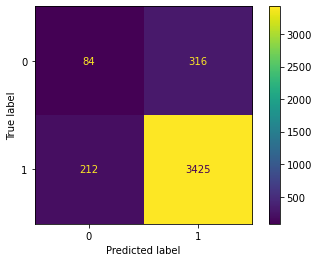

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


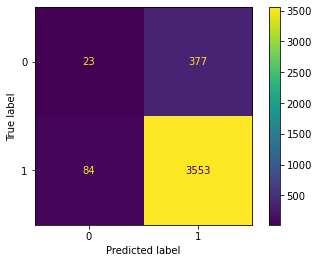

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


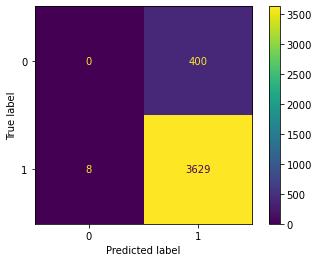

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


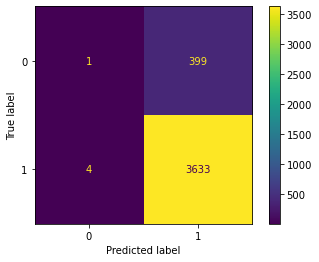

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


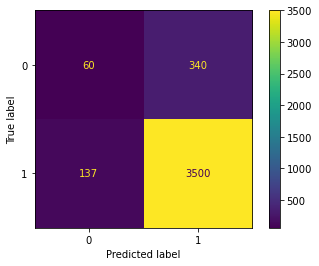

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


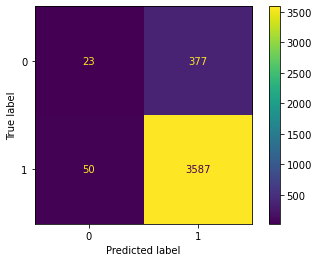

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.8695,0.9156,0.5996,0.9420,0.5774,0.9290,0.5858,0.6505
Naive Bayes,0.8858,0.9041,0.5821,0.9769,0.5172,0.9390,0.5147,0.6513
Logistic Regression,0.8989,0.9007,0.4504,0.9978,0.4989,0.9468,0.4734,0.6592
AdaBoost,0.9002,0.9010,0.4755,0.9989,0.5007,0.9474,0.4761,0.6638
Random Forest,0.8818,0.9118,0.6040,0.9626,0.5588,0.9371,0.5642,0.6686
XGBoost,0.8942,0.9049,0.6182,0.9863,0.5219,0.9438,0.5204,0.6818


In [24]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X,y)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


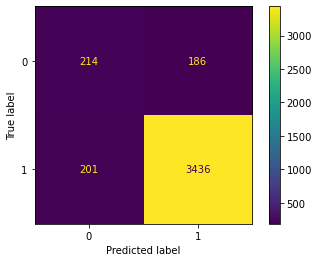

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

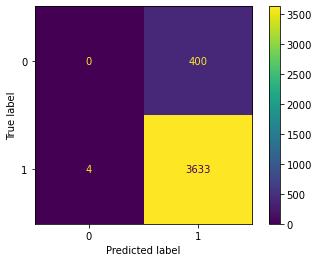

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


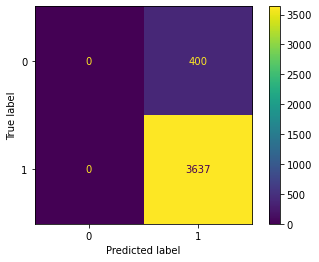

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


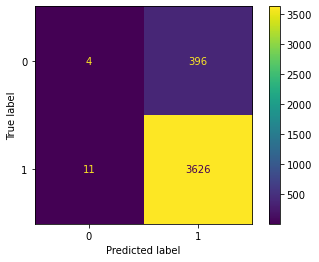

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


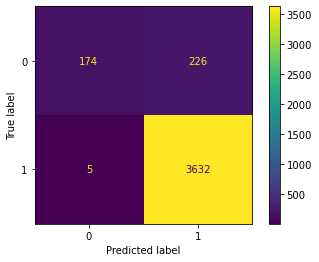

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


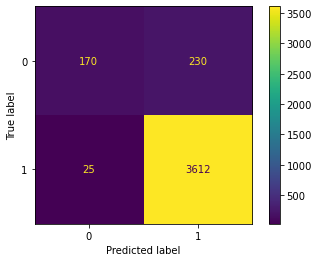

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.9056,0.9465,0.7420,0.9458,0.7358,0.9468,0.7413,0.7379
Naive Bayes,0.8999,0.9008,0.4504,0.9989,0.4995,0.9473,0.4737,0.6689
Logistic Regression,0.9009,0.9009,0.4505,1.0000,0.5000,0.9479,0.4739,0.6460
AdaBoost,0.8992,0.9015,0.5383,0.9970,0.5035,0.9469,0.4827,0.7057
Random Forest,0.9408,0.9411,0.9422,0.9981,0.7149,0.9684,0.7816,0.8773
XGBoost,0.9368,0.9402,0.9074,0.9931,0.7091,0.9659,0.7677,0.8371


In [25]:
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#情感比率
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X1,y1)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


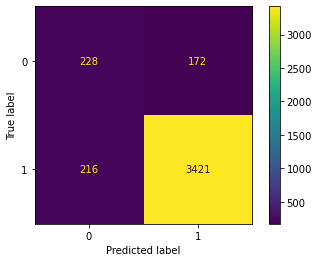

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


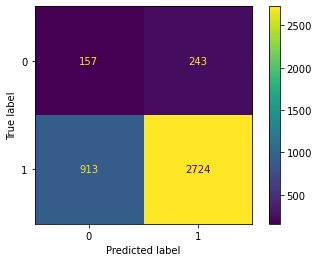

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

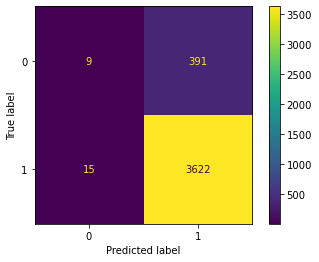

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


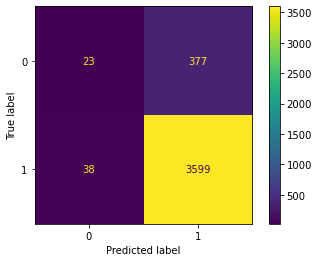

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


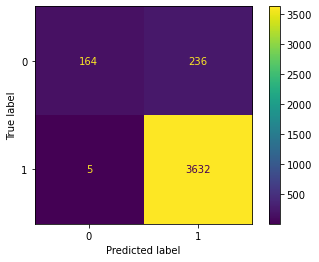

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


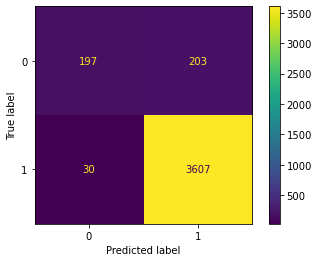

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.9017,0.9495,0.7289,0.9428,0.7471,0.9474,0.7402,0.7478
Naive Bayes,0.7136,0.9182,0.5323,0.7490,0.5707,0.8249,0.5189,0.6501
Logistic Regression,0.8994,0.9026,0.6738,0.9959,0.5092,0.9469,0.4941,0.6838
AdaBoost,0.8972,0.9052,0.6384,0.9896,0.5235,0.9455,0.5220,0.7460
Random Forest,0.9406,0.9386,0.9586,0.9989,0.6958,0.9679,0.7731,0.9107
XGBoost,0.9423,0.9468,0.9125,0.9918,0.7421,0.9687,0.7977,0.9015


In [26]:
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X2,y2)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


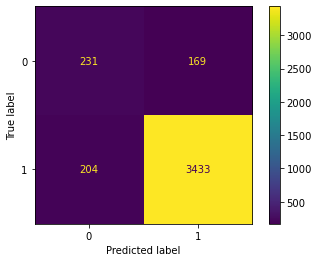

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


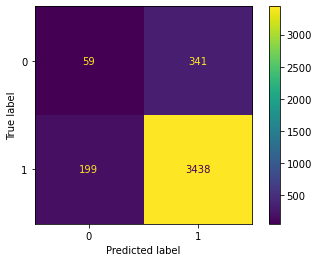

Logistic Regression
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
roc_auc


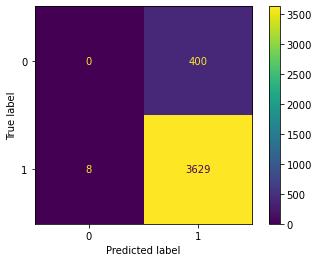

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro
f1_macro
roc_auc


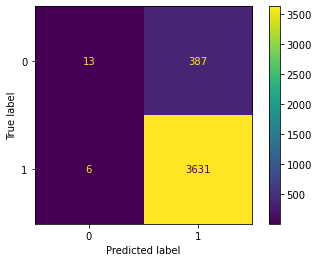

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


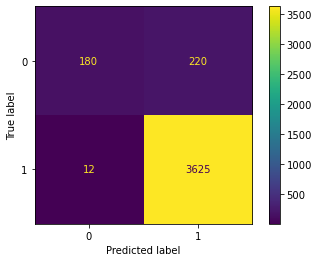

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


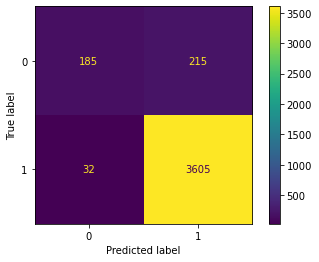

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.9036,0.9533,0.7426,0.9414,0.7556,0.9482,0.7454,0.7565
Naive Bayes,0.8662,0.9098,0.5713,0.9453,0.5464,0.9271,0.5520,0.6846
Logistic Regression,0.8989,0.9007,0.4504,0.9978,0.4989,0.9468,0.4734,0.6751
AdaBoost,0.9026,0.9037,0.7527,0.9984,0.5154,0.9487,0.5045,0.7154
Random Forest,0.9430,0.9427,0.9423,0.9984,0.7159,0.9696,0.7872,0.8886
XGBoost,0.9388,0.9437,0.9002,0.9912,0.7269,0.9669,0.7828,0.8520


In [27]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述+情感
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X3,y3)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


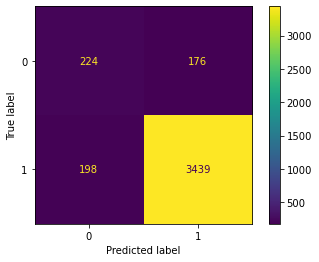

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


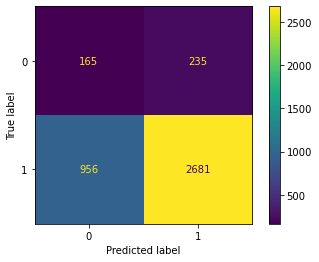

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

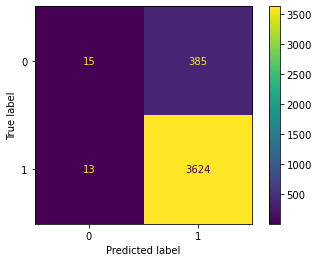

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


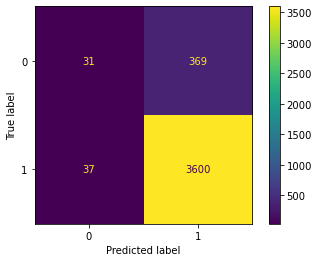

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


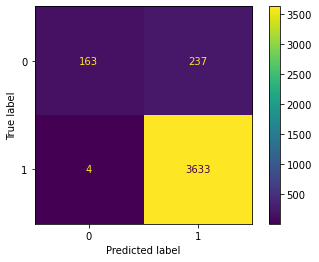

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


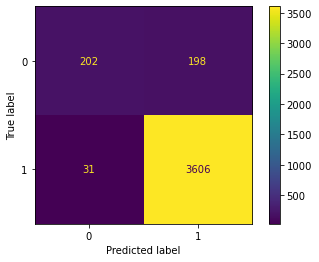

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.9051,0.9514,0.7354,0.9387,0.7578,0.9485,0.7433,0.7449
Naive Bayes,0.7050,0.9195,0.5332,0.7371,0.5748,0.8181,0.5173,0.6512
Logistic Regression,0.9014,0.9040,0.7887,0.9964,0.5170,0.9479,0.5081,0.6950
AdaBoost,0.8994,0.9071,0.6691,0.9898,0.5337,0.9466,0.5379,0.7475
Random Forest,0.9413,0.9385,0.9613,0.9992,0.7046,0.9680,0.7645,0.9087
XGBoost,0.9433,0.9480,0.9115,0.9915,0.7482,0.9692,0.8021,0.8971


In [28]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#KAM敘述+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X4,y4)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


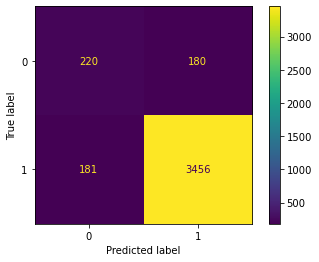

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


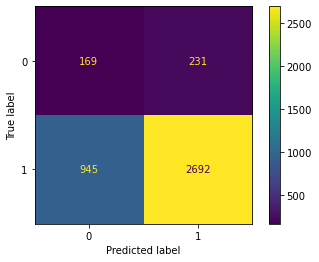

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

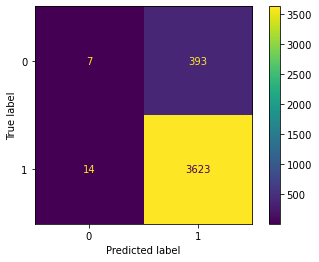

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


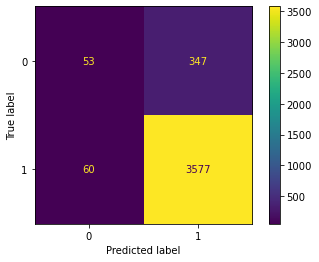

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


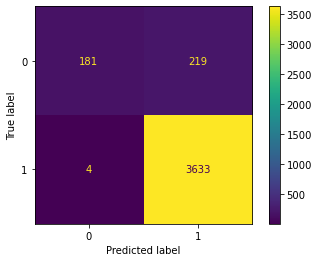

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


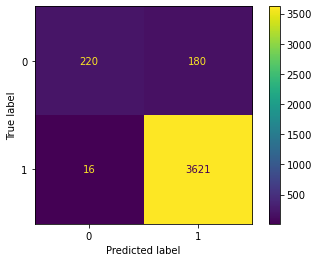

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.9113,0.9521,0.7471,0.9494,0.7619,0.9492,0.7556,0.7619
Naive Bayes,0.7087,0.9211,0.5361,0.7402,0.5813,0.8206,0.5214,0.6584
Logistic Regression,0.8992,0.9021,0.6011,0.9962,0.5068,0.9468,0.4894,0.6879
AdaBoost,0.8992,0.9116,0.6995,0.9835,0.5580,0.9462,0.5751,0.7833
Random Forest,0.9435,0.9429,0.9619,0.9984,0.7271,0.9700,0.7981,0.9299
XGBoost,0.9514,0.9527,0.9447,0.9956,0.7728,0.9737,0.8320,0.9136


In [29]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#情感+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X5,y5)
ResultToFrame()

Decision Tree
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


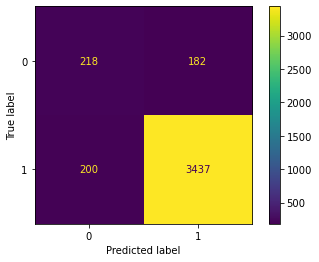

Naive Bayes
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


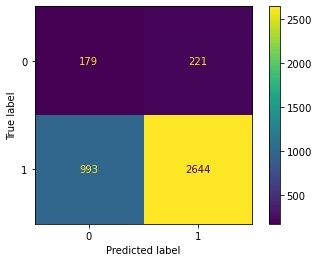

Logistic Regression
accuracy


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_micro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

recall_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

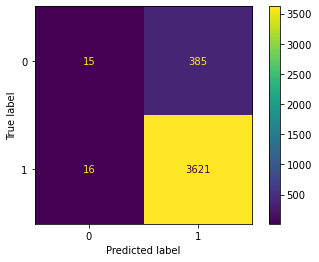

AdaBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


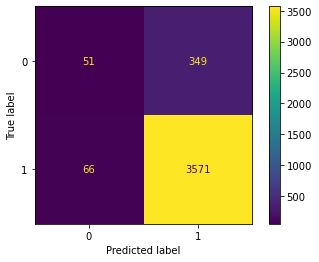

Random Forest
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


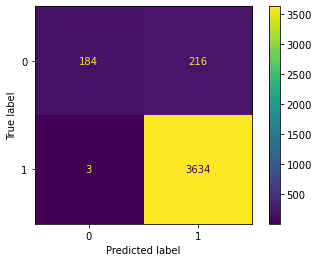

XGBoost
accuracy
precision_micro
recall_micro
f1_micro
precision
recall
f1
precision_macro
recall_macro
f1_macro
roc_auc


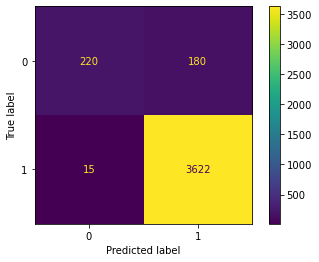

,Accuracy,Presicion,Presicion_macro,Recall,Recall_macro,F1,F1_macro,ROC
Decision Tree,0.9086,0.9513,0.7468,0.9505,0.7501,0.9512,0.7559,0.7496
Naive Bayes,0.6993,0.9230,0.5376,0.7270,0.5872,0.8131,0.5200,0.6592
Logistic Regression,0.9007,0.9039,0.7870,0.9956,0.5166,0.9475,0.5078,0.6956
AdaBoost,0.8972,0.9110,0.6727,0.9818,0.5547,0.9451,0.5705,0.7902
Random Forest,0.9467,0.9430,0.9647,0.9995,0.7258,0.9698,0.7933,0.9278
XGBoost,0.9517,0.9527,0.9472,0.9959,0.7729,0.9738,0.8324,0.9174


In [30]:
#Y是否為四大事務所
ac = []
pre = []
rec = []
f1 = []
pre_ma = []
rec_ma = []
f1_ma = []
roc = []

#ALL
for name, clf in zip(names, classifiers):
    print(str(name))
    forKFoldclassifiscore(clf,X6,y6)
ResultToFrame()

#### one-way ANOVA

In [31]:
def OneWayAnovaToFrame(xlist):
    fvalue = []
    anovapvalue = []
    for i in xlist:
        lenzero = df[df['四大事務所編碼']==0][i]
        lenone = df[df['四大事務所編碼']==1][i]
        lentwo = df[df['四大事務所編碼']==2][i]
        lenthree = df[df['四大事務所編碼']==3][i]
        lenfour = df[df['四大事務所編碼']==4][i]

        FValue, pValue = stats.f_oneway(lenzero, lenone, lentwo, lenthree, lenfour)
        #print(FValue, pValue)
        fvalue.append(FValue)
        anovapvalue.append(pValue)
        
        
    anoresult_df = pd.DataFrame()
    anoresult_df['F-Score'] = fvalue
    anoresult_df['P-Value'] = anovapvalue
    anoresult_df.index = xlist
    return(anoresult_df)

In [32]:
#區分是否為四大會計師事務所
zero = (df["四大事務所編碼"] == 0)
df_zero = df[zero]
one = (df["四大事務所編碼"] == 1)
df_one = df[one]
two = (df["四大事務所編碼"] == 2)
df_two = df[two]
three = (df["四大事務所編碼"] == 3)
df_three = df[three]
four = (df["四大事務所編碼"] == 4)
df_four = df[four]

In [33]:
def MutiStatisticalNarrativesToFrameByOne(frame):
    sncount = []
    snmean = []
    snstd = []
    snmax = []
    snmin = []
    snind = []
    for x in inde:
        sncount.append(frame[x].count())
        snmean.append(frame[x].mean())
        snstd.append(frame[x].std())
        snmax.append(frame[x].max())
        snmin.append(frame[x].min())
    StatRes = pd.DataFrame()
    StatRes['Count'] = sncount
    StatRes['Mean'] = snmean
    StatRes['StD'] = snstd
    StatRes['Max'] = snmax
    StatRes['Min'] = snmin 
    StatRes.index = inde
    
    return(StatRes)

In [34]:
d = MutiStatisticalNarrativesToFrameByOne(df_zero)
e = MutiStatisticalNarrativesToFrameByOne(df_one)
f = MutiStatisticalNarrativesToFrameByOne(df_two)
g = MutiStatisticalNarrativesToFrameByOne(df_three)
h = MutiStatisticalNarrativesToFrameByOne(df_four)

In [35]:
from scipy import stats
col=['KAM_len', 'KAM項目數', 'KAM平均詞數',
        '爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例',
        '段落數', '句數', '段落平均句數', '字數', '詞數',
        '成語數', '相異詞數比率', '實詞密度', '難詞數', '領域實詞頻對數平均',
        '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數',
        '二字詞數', '三字詞數', '句平均成語數', '句平均詞數', '單句數比率',
        '名詞片語修飾語比率', '名詞片語千分比', '實詞數', '否定詞數',
        '複雜語意類別句子數', '代名詞數', '人稱代名詞數', '連接詞數', 
        '正向連接詞數', '負向連接詞數']

i = OneWayAnovaToFrame(col)
i

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,F-Score,P-Value
KAM_len,433.105359,6.744336e-311
KAM項目數,372.978190,1.249074e-273
KAM平均詞數,114.235882,2.094620e-92
爭議詞比例,169.554530,2.202895e-134
強語氣詞比例,202.186909,2.982432e-158
弱語氣詞比例,275.730373,8.525527e-210
負面詞比例,24.332001,6.345069e-20
正面詞比例,121.345356,6.536583e-98
不確定詞比例,245.875973,3.113493e-189
段落數,NaN,NaN


In [36]:
names = ["Decision Tree", "Naive Bayes", "AdaBoost", "Random Forest", "XGBoost"]
classifiers = [DecisionTreeClassifier(),
               GaussianNB(),
               AdaBoostClassifier(),
               RandomForestClassifier(),
               XGBClassifier()           ]

In [37]:
col=['KAM_len', 'KAM項目數', 'KAM平均詞數']
X=df[col]
y=df['四大事務所編碼']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X1=df[col]
y1=df['四大事務所編碼']

col=['字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X2=df[col]
y2=df['四大事務所編碼']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例']
X3=df[col]
y3=df['四大事務所編碼']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X4=df[col]
y4=df['四大事務所編碼']

col=['爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例', '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X5=df[col]
y5=df['四大事務所編碼']

col=['KAM_len', 'KAM項目數', 'KAM平均詞數','爭議詞比例','強語氣詞比例', '弱語氣詞比例', '負面詞比例', '正面詞比例', '不確定詞比例',
     '字數', '詞數', '相異詞數比率', '難詞數', '低筆劃字元數', '中筆劃字元數', '高筆劃字元數', '字元平均筆劃數', '二字詞數',
       '三字詞數', '句數', '句平均詞數', '單句數比率', '名詞片語修飾語比率', '名詞片語千分比', '句平均成語數', '實詞數',
       '否定詞數', '複雜語意類別句子數', '實詞密度', '領域實詞頻對數平均', '成語數', '代名詞數', '人稱代名詞數',
       '連接詞數', '正向連接詞數', '負向連接詞數']
X6=df[col]
y6=df['四大事務所編碼']

In [38]:
def MutiforKFoldclassifiscore(clf,X,y):
    #kf = KFold(n_splits=10,shuffle = True, random_state=0)
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    #scoring = ['accuracy' ,'precision_micro','recall_micro','f1_micro','precision_macro','recall_macro','f1_macro']
    scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
    clf.fit(X, y) 
    for s in scoring:
        print(s)
        results = cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=s)
        #print(results)
        #print(results.mean())
        if s=='accuracy':
            ac.append(results.mean())
        if s=='precision_macro':
            pre_ma.append(results.mean())
        if s=='recall_macro':
            rec_ma.append(results.mean())
        if s=='f1_macro':
            f1_ma.append(results.mean())
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    confusionMatrix = confusion_matrix(y, y_pred, labels=[0, 1, 2, 3, 4])
    print(confusionMatrix)
    
    confusion_matrix2 = metrics.confusion_matrix(y, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [0, 1, 2, 3, 4])

    cm_display.plot()
    plt.show()

In [39]:
def MutiResultToFrame():
    result_df = pd.DataFrame()
    result_df['Accuracy'] = ac
    result_df['Presicion_macro'] = pre_ma
    result_df['Recall_macro'] = rec_ma
    result_df['F1_macro'] = f1_ma
    result_df.index = names
    return(result_df)

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 116  101   80   27   76]
 [ 113  541  141   28  153]
 [  93  176  257   68  219]
 [  39   63  109   76   80]
 [  55  133  101   36 1156]]


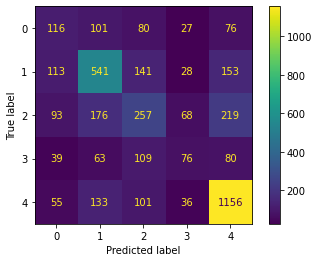

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

[[   4  105  197    0   94]
 [   3  514  221    0  238]
 [  11  132  422    0  248]
 [   4   37  245    0   81]
 [   0   76  140    0 1265]]


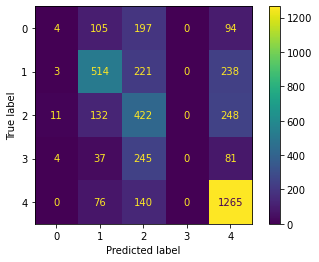

AdaBoost
accuracy
precision_macro


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetri

recall_macro
f1_macro
[[   3  131  165   14   87]
 [   3  586  184    6  197]
 [   2  166  373   26  246]
 [   2   51  209   25   80]
 [   5  146   82   14 1234]]


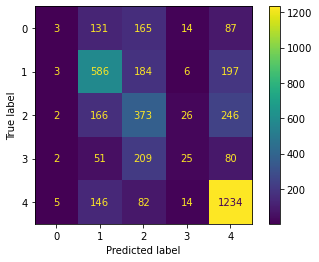

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[  83  109   85   35   88]
 [  91  502  157   42  184]
 [  66  138  281   89  239]
 [  28   55  103   96   85]
 [  35  121   91   32 1202]]


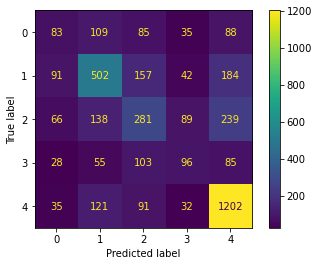

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  59  119  104   34   84]
 [  58  573  142   35  168]
 [  39  161  294   71  248]
 [  25   52  128   77   85]
 [  21  118   73   30 1239]]


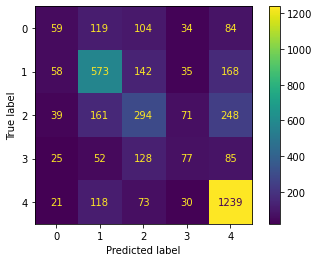

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.531342,0.443469,0.430718,0.431745
Naive Bayes,0.546208,0.364804,0.381967,0.346947
AdaBoost,0.550173,0.367147,0.393586,0.364069
Random Forest,0.533569,0.451122,0.427955,0.432947
XGBoost,0.555368,0.450954,0.428577,0.429398


In [40]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#KAM敘述
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X,y)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 215   47   53   25   60]
 [  59  693   81   27  116]
 [  36   73  616   27   61]
 [  15   16   23  279   34]
 [  77  110   93   46 1155]]


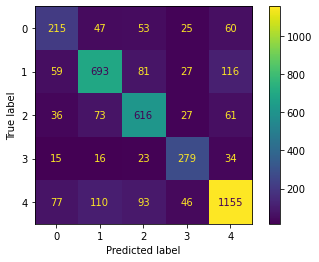

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[  12  103  139   34  112]
 [  11  522  199   43  201]
 [  15   82  509   97  110]
 [   3   63   50  162   89]
 [  12  151  158   61 1099]]


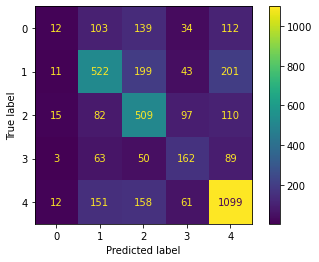

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  29  118  121   36   96]
 [  28  574  150   39  185]
 [  67  127  400   85  134]
 [   7   55   72  158   75]
 [  32  198  102   63 1086]]


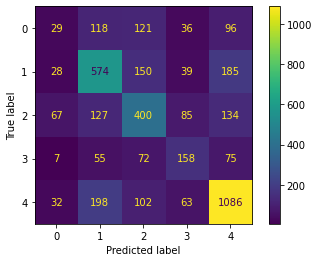

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 207   48   56   22   67]
 [   6  806   57   18   89]
 [  11   39  682   16   65]
 [   7   16   15  294   35]
 [  13   85   52   16 1315]]


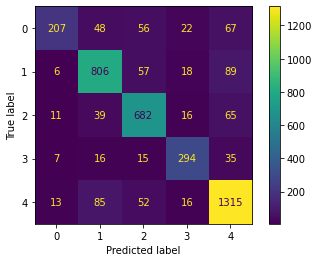

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 197   48   56   27   72]
 [  17  787   57   15  100]
 [  12   53  661   25   62]
 [  12   17   18  287   33]
 [  24  104   63   23 1267]]


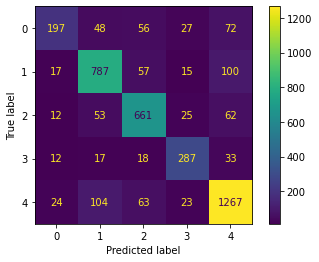

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.730993,0.692126,0.707770,0.695687
Naive Bayes,0.570716,0.480019,0.474907,0.456618
AdaBoost,0.556603,0.460725,0.463413,0.455054
Random Forest,0.813718,0.813994,0.771782,0.790606
XGBoost,0.792416,0.781162,0.749837,0.758461


In [41]:
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#情感比率
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X1,y1)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 222   64   43    8   63]
 [  50  763   90    6   67]
 [  42   75  613   10   73]
 [   6    7   15  320   19]
 [  68   82   78   27 1226]]


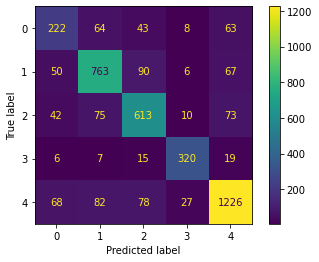

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[  37  106  120   31  106]
 [  21  493  226   13  223]
 [  25  165  347   16  260]
 [  11    8    2  274   72]
 [  30   58   70   40 1283]]


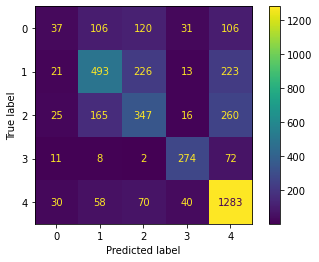

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  55  141   99   16   89]
 [  41  742   90    8   95]
 [  20  331  284   19  159]
 [   5    4   18  292   48]
 [  35  151   53   39 1203]]


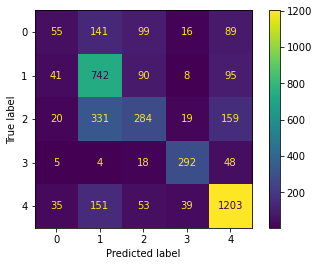

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 223   59   38   10   70]
 [   8  853   47    3   65]
 [   8   57  687   10   51]
 [   0    5    1  337   24]
 [  15   34   36   13 1383]]


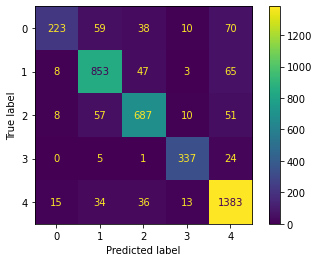

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 239   49   39   12   61]
 [  20  863   38    3   52]
 [  14   44  698    9   48]
 [   1    5    2  350    9]
 [  18   34   46   13 1370]]


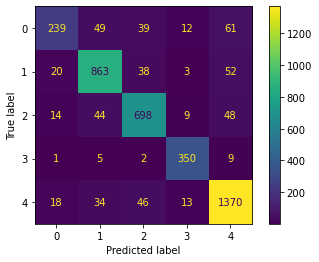

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.781767,0.753582,0.765975,0.761422
Naive Bayes,0.602925,0.545375,0.527536,0.522183
AdaBoost,0.638102,0.593733,0.571104,0.562723
Random Forest,0.862516,0.868128,0.827906,0.841334
XGBoost,0.871933,0.867358,0.843832,0.850983


In [42]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X2,y2)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 207   57   61   20   55]
 [  43  752   67   31   83]
 [  48   58  616   26   65]
 [  15   16   27  280   29]
 [  53  102   71   40 1215]]


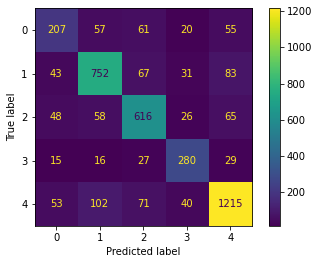

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[  13   84  153   62   88]
 [   3  594  107   81  191]
 [  14   88  406   95  210]
 [   8   39   83  156   81]
 [   6   68   79   76 1252]]


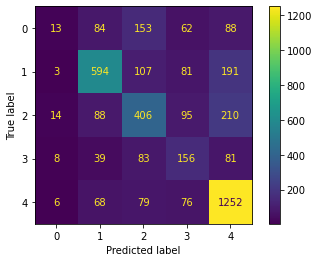

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  60  113  114   39   74]
 [  41  637  107   32  159]
 [  55  108  437   80  133]
 [  27   39   64  167   70]
 [  34  118   86   49 1194]]


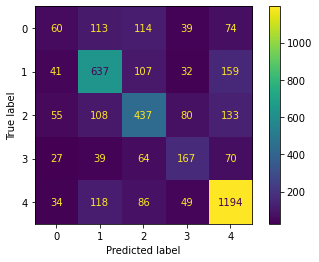

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 210   64   56   21   49]
 [  17  835   35   12   77]
 [  11   33  691   19   59]
 [   8   15   18  305   21]
 [  12   65   49   12 1343]]


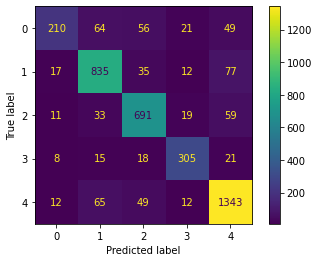

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 215   58   53   18   56]
 [  20  835   34   15   72]
 [  21   42  673   17   60]
 [  13   16   21  293   24]
 [  19   67   49   16 1330]]


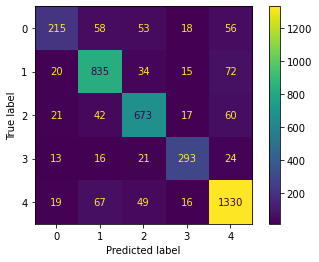

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.762923,0.719955,0.726689,0.722766
Naive Bayes,0.599708,0.494451,0.482205,0.464987
AdaBoost,0.618038,0.527247,0.520282,0.518294
Random Forest,0.835763,0.824383,0.792604,0.804000
XGBoost,0.828828,0.813373,0.783434,0.793260


In [43]:
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#KAM敘述+情感比率
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X3,y3)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 217   56   50   11   66]
 [  62  761   73    6   74]
 [  36   75  611   13   78]
 [   7    5   18  319   18]
 [  78   69   90   23 1221]]


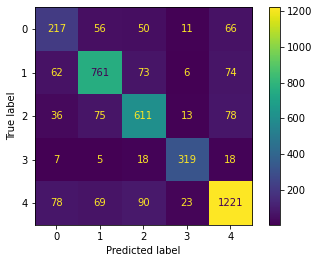

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[  36  110  129   30   95]
 [  23  501  212   11  229]
 [  33  155  347   20  258]
 [  15    7    3  268   74]
 [  28   63   65   44 1281]]


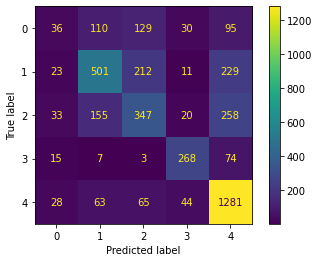

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  55  124  115   18   88]
 [  27  761   80    8  100]
 [  23  250  362   18  160]
 [   6    3   21  299   38]
 [  28  132   73   37 1211]]


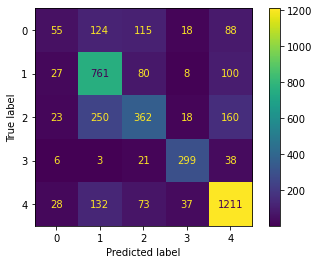

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 231   45   42    9   73]
 [  11  843   49    3   70]
 [   9   51  691   10   52]
 [   2    4    2  334   25]
 [  13   35   31   14 1388]]


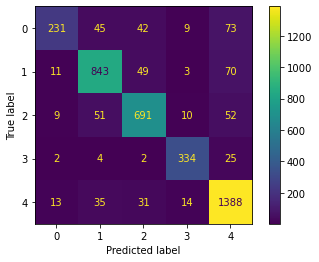

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 234   42   43    9   72]
 [  23  862   38    4   49]
 [  19   47  696    8   43]
 [   2    5    2  349    9]
 [  12   34   48   12 1375]]


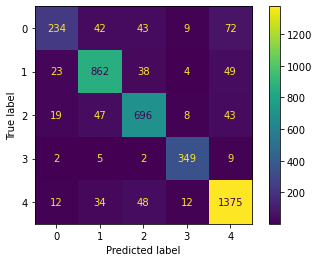

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.773339,0.750768,0.752006,0.748519
Naive Bayes,0.602682,0.540972,0.525145,0.520034
AdaBoost,0.665856,0.620566,0.599100,0.590829
Random Forest,0.864747,0.869291,0.828600,0.841796
XGBoost,0.870945,0.867314,0.840729,0.848663


In [44]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#KAM敘述+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X4,y4)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 221   47   51    8   73]
 [  55  810   48    2   61]
 [  40   55  640   13   65]
 [  10   10   10  322   15]
 [  68   85   66   24 1238]]


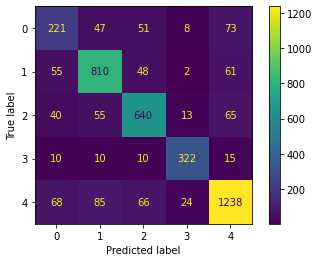

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[  37  104  125   32  102]
 [  22  515  208   14  217]
 [  34  151  355   16  257]
 [   8    8    5  274   72]
 [  28   52   71   51 1279]]


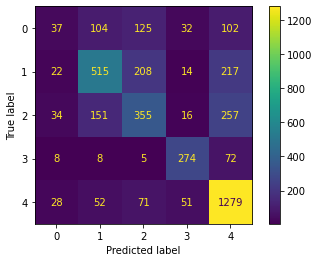

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  65  118  111   17   89]
 [  45  778   52    5   96]
 [  50  192  433   16  122]
 [  11    6   25  289   36]
 [  45  105   64   33 1234]]


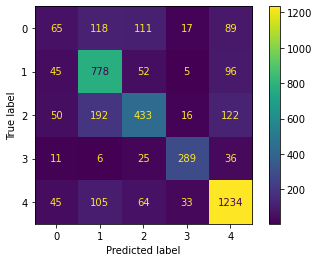

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 238   50   41   10   61]
 [   4  891   22    1   58]
 [   5   35  723    9   41]
 [   1    5    2  340   19]
 [  10   31   32   10 1398]]


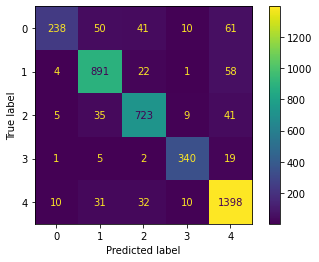

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 263   26   43    9   59]
 [  10  896   24    1   45]
 [  15   27  731    5   35]
 [   0    2    2  351   12]
 [  11   32   34   14 1390]]


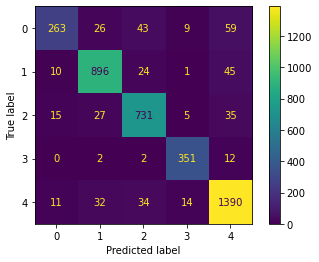

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.800335,0.779947,0.780706,0.772574
Naive Bayes,0.609365,0.544962,0.533444,0.526413
AdaBoost,0.693344,0.639004,0.622622,0.621410
Random Forest,0.888778,0.899734,0.855751,0.865289
XGBoost,0.899426,0.900866,0.873923,0.882853


In [45]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#情感+可讀性
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X5,y5)
MutiResultToFrame()

Decision Tree
accuracy
precision_macro
recall_macro
f1_macro
[[ 235   43   55   11   56]
 [  47  812   43    5   69]
 [  47   54  637   13   62]
 [   7   10   13  326   11]
 [  65   65   83   16 1252]]


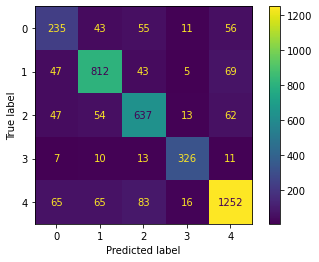

Naive Bayes
accuracy
precision_macro
recall_macro
f1_macro
[[  36  104  134   31   95]
 [  24  521  192   14  225]
 [  35  144  365   22  247]
 [  14    8    3  269   73]
 [  25   57   64   53 1282]]


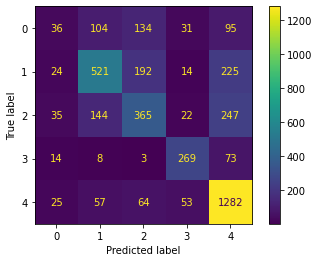

AdaBoost
accuracy
precision_macro
recall_macro
f1_macro
[[  68  116  110   17   89]
 [  32  774   65    6   99]
 [  47  168  450   16  132]
 [  13    5   25  288   36]
 [  32  112   70   33 1234]]


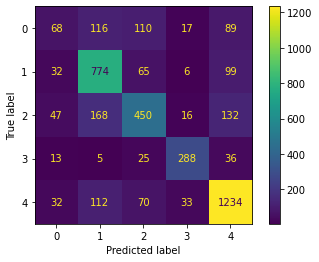

Random Forest
accuracy
precision_macro
recall_macro
f1_macro
[[ 234   47   45    9   65]
 [   8  885   22    2   59]
 [   7   30  726    9   41]
 [   1    3    2  346   15]
 [   5   36   31   11 1398]]


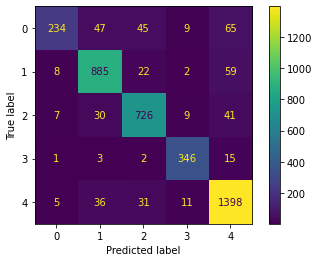

XGBoost
accuracy
precision_macro
recall_macro
f1_macro
[[ 271   28   36   10   55]
 [  11  894   23    2   46]
 [  19   28  725    7   34]
 [   1    4    2  350   10]
 [  15   33   32   14 1387]]


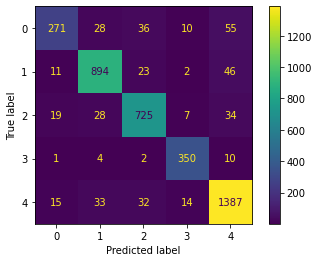

,Accuracy,Presicion_macro,Recall_macro,F1_macro
Decision Tree,0.804059,0.787875,0.790420,0.782478
Naive Bayes,0.612588,0.544770,0.534325,0.527282
AdaBoost,0.697062,0.646757,0.626977,0.626410
Random Forest,0.890508,0.898164,0.852527,0.870846
XGBoost,0.898434,0.894454,0.875079,0.881621


In [46]:
#Y是否、是哪一四大事務所
ac = []
pre_ma = []
rec_ma = []
f1_ma = []

#ALL
for name, clf in zip(names, classifiers):
    print(str(name))
    MutiforKFoldclassifiscore(clf,X6,y6)
MutiResultToFrame()

In [47]:
#for show and compare
forshow = pd.DataFrame({"四大平均":a["Mean"].values,
                        "非四大平均":b["Mean"].values,
                        "四大標準差":a["StD"].values,
                        "非四大標準差":b["StD"].values,
                        "四大最大":a["Max"].values,
                        "非四大最大":b["Max"].values,
                        "四大最小":a["Min"].values,
                        "非四大最小":b["Min"].values})
forshow.index = inde
forshow = forshow.round(4)
forshow["T-Score"] = c['T-Score'].values
forshow["P-Value"] = c['P-Value'].values

forshow1 = pd.DataFrame({"非四大平均":d["Mean"].values,
                         "資誠平均":e["Mean"].values,
                         "安侯平均":f["Mean"].values,
                         "安永平均":g["Mean"].values,
                         "勤業平均":h["Mean"].values,
                         "非四大標準差":d["StD"].values,
                         "資誠標準差":e["StD"].values,
                         "安侯標準差":f["StD"].values,
                         "安永標準差":g["StD"].values,
                         "勤業標準差":h["StD"].values})
forshow1.index = inde
forshow1 = forshow1.round(4)
forshow1["F-Score"] = i['F-Score'].values
forshow1["P-Value"] = i['P-Value'].values

In [48]:
forshow

,四大平均,非四大平均,四大標準差,非四大標準差,四大最大,非四大最大,四大最小,非四大最小,T-Score,P-Value
KAM_len,418.5823,509.8700,197.4553,201.7797,1684.0000,1587.0000,91.0000,157.0000,-8.757231,2.894656e-18
KAM項目數,1.5944,2.0075,0.6863,0.7408,5.0000,4.0000,1.0000,1.0000,-11.332389,2.505830e-29
KAM平均詞數,267.7206,263.1517,73.5186,77.1830,1162.0000,787.0000,68.5000,96.5000,1.173813,2.405391e-01
爭議詞比例,0.0747,0.0758,0.0167,0.0165,0.1739,0.1316,0.0242,0.0269,-1.273779,2.028150e-01
強語氣詞比例,0.0028,0.0028,0.0023,0.0025,0.0216,0.0114,0.0000,0.0000,-0.144804,8.848732e-01
弱語氣詞比例,0.0028,0.0036,0.0031,0.0031,0.0189,0.0140,0.0000,0.0000,-5.092609,3.692975e-07
負面詞比例,0.0126,0.0131,0.0075,0.0061,0.0656,0.0460,0.0000,0.0000,-1.198407,2.308291e-01
正面詞比例,0.0776,0.0863,0.0211,0.0189,0.1703,0.1494,0.0284,0.0412,-7.893932,3.743803e-15
不確定詞比例,0.0278,0.0343,0.0155,0.0118,0.0889,0.0690,0.0000,0.0000,-8.083435,8.245925e-16
段落數,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,NaN,NaN


In [49]:
forshow1

,非四大平均,資誠平均,安侯平均,安永平均,勤業平均,非四大標準差,資誠標準差,安侯標準差,安永標準差,勤業標準差,F-Score,P-Value
KAM_len,509.8700,560.9980,465.6777,444.3270,292.4956,201.7797,207.3172,176.7898,145.8734,119.9749,433.105359,6.744336e-311
KAM項目數,2.0075,1.8709,1.9139,1.9128,1.1580,0.7408,0.6498,0.7428,0.6255,0.3968,372.978190,1.249074e-273
KAM平均詞數,263.1517,307.7835,252.5349,238.8906,256.7990,77.1830,74.8399,63.8853,53.5179,71.6292,114.235882,2.094620e-92
爭議詞比例,0.0758,0.0641,0.0778,0.0740,0.0801,0.0165,0.0133,0.0151,0.0134,0.0171,169.554530,2.202895e-134
強語氣詞比例,0.0028,0.0029,0.0014,0.0014,0.0037,0.0025,0.0020,0.0020,0.0018,0.0021,202.186909,2.982432e-158
弱語氣詞比例,0.0036,0.0035,0.0051,0.0013,0.0015,0.0031,0.0025,0.0036,0.0017,0.0024,275.730373,8.525527e-210
負面詞比例,0.0131,0.0137,0.0106,0.0141,0.0126,0.0061,0.0080,0.0057,0.0059,0.0083,24.332001,6.345069e-20
正面詞比例,0.0863,0.0806,0.0879,0.0737,0.0710,0.0189,0.0183,0.0196,0.0166,0.0220,121.345356,6.536583e-98
不確定詞比例,0.0343,0.0314,0.0371,0.0287,0.0202,0.0118,0.0134,0.0130,0.0097,0.0155,245.875973,3.113493e-189
段落數,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN


In [57]:
b

,Count,Mean,StD,Max,Min
KAM_len,400,509.870000,201.779684,1587.000000,157.000000
KAM項目數,400,2.007500,0.740821,4.000000,1.000000
KAM平均詞數,400,263.151725,77.183050,787.000000,96.500000
爭議詞比例,400,0.075791,0.016513,0.131600,0.026900
強語氣詞比例,400,0.002770,0.002474,0.011400,0.000000
弱語氣詞比例,400,0.003621,0.003051,0.014000,0.000000
負面詞比例,400,0.013089,0.006079,0.046000,0.000000
正面詞比例,400,0.086325,0.018879,0.149400,0.041200
不確定詞比例,400,0.034292,0.011760,0.069000,0.000000
段落數,400,1.000000,0.000000,1.000000,1.000000


In [50]:
d

,Count,Mean,StD,Max,Min
KAM_len,400,509.870000,201.779684,1587.000000,157.000000
KAM項目數,400,2.007500,0.740821,4.000000,1.000000
KAM平均詞數,400,263.151725,77.183050,787.000000,96.500000
爭議詞比例,400,0.075791,0.016513,0.131600,0.026900
強語氣詞比例,400,0.002770,0.002474,0.011400,0.000000
弱語氣詞比例,400,0.003621,0.003051,0.014000,0.000000
負面詞比例,400,0.013089,0.006079,0.046000,0.000000
正面詞比例,400,0.086325,0.018879,0.149400,0.041200
不確定詞比例,400,0.034292,0.011760,0.069000,0.000000
段落數,400,1.000000,0.000000,1.000000,1.000000


In [51]:
e

,Count,Mean,StD,Max,Min
KAM_len,976,560.997951,207.317153,1684.000000,189.000000
KAM項目數,976,1.870902,0.649839,5.000000,1.000000
KAM平均詞數,976,307.783453,74.839873,714.000000,101.000000
爭議詞比例,976,0.064050,0.013335,0.122700,0.028700
強語氣詞比例,976,0.002948,0.002028,0.021600,0.000000
弱語氣詞比例,976,0.003470,0.002471,0.012400,0.000000
負面詞比例,976,0.013698,0.007958,0.051900,0.000000
正面詞比例,976,0.080617,0.018276,0.149200,0.031800
不確定詞比例,976,0.031434,0.013423,0.071700,0.000000
段落數,976,1.000000,0.000000,1.000000,1.000000


In [52]:
f

,Count,Mean,StD,Max,Min
KAM_len,813,465.677737,176.789783,1344.000000,186.000000
KAM項目數,813,1.913899,0.742759,5.000000,1.000000
KAM平均詞數,813,252.534932,63.885333,746.000000,106.000000
爭議詞比例,813,0.077831,0.015113,0.130300,0.038100
強語氣詞比例,813,0.001420,0.001971,0.009600,0.000000
弱語氣詞比例,813,0.005053,0.003610,0.018900,0.000000
負面詞比例,813,0.010644,0.005671,0.042000,0.000000
正面詞比例,813,0.087899,0.019561,0.166000,0.038500
不確定詞比例,813,0.037107,0.013006,0.082100,0.000000
段落數,813,1.000000,0.000000,1.000000,1.000000


In [53]:
g

,Count,Mean,StD,Max,Min
KAM_len,367,444.326975,145.873371,1259.000000,91.000000
KAM項目數,367,1.912807,0.625527,5.000000,1.000000
KAM平均詞數,367,238.890599,53.517931,583.500000,68.500000
爭議詞比例,367,0.074020,0.013400,0.111400,0.038500
強語氣詞比例,367,0.001376,0.001832,0.013400,0.000000
弱語氣詞比例,367,0.001266,0.001741,0.008600,0.000000
負面詞比例,367,0.014139,0.005862,0.040700,0.002700
正面詞比例,367,0.073749,0.016604,0.114200,0.031400
不確定詞比例,367,0.028660,0.009685,0.056300,0.004100
段落數,367,1.000000,0.000000,1.000000,1.000000


In [54]:
h

,Count,Mean,StD,Max,Min
KAM_len,1481,292.495611,119.974936,1440.000000,146.000000
KAM項目數,1481,1.158001,0.396801,4.000000,1.000000
KAM平均詞數,1481,256.799001,71.629199,1162.000000,78.500000
爭議詞比例,1481,0.080093,0.017082,0.173900,0.024200
強語氣詞比例,1481,0.003697,0.002113,0.014000,0.000000
弱語氣詞比例,1481,0.001503,0.002395,0.013800,0.000000
負面詞比例,1481,0.012621,0.008285,0.065600,0.000000
正面詞比例,1481,0.071010,0.021995,0.170300,0.028400
不確定詞比例,1481,0.020168,0.015496,0.088900,0.000000
段落數,1481,1.000000,0.000000,1.000000,1.000000


In [58]:
i

,F-Score,P-Value
KAM_len,433.105359,6.744336e-311
KAM項目數,372.978190,1.249074e-273
KAM平均詞數,114.235882,2.094620e-92
爭議詞比例,169.554530,2.202895e-134
強語氣詞比例,202.186909,2.982432e-158
弱語氣詞比例,275.730373,8.525527e-210
負面詞比例,24.332001,6.345069e-20
正面詞比例,121.345356,6.536583e-98
不確定詞比例,245.875973,3.113493e-189
段落數,NaN,NaN


In [55]:
#計算各間資料筆數
#print(d['Count'][0])